
SUBMITTED BY : **BAIBHAV KASHYAP**

Aim: **Train a Model : Vector DB + DeepSeek LLM**

Solution : **RAG**  

R-**RETRIEVAL**

A-**AUGMENTED**

G-**GENERATION**

======================================
Frameworks ad libraries used==================================

**LangChain**

**LangChain-Community**

**Ollama**

**DeepSeek (via Ollama)**

**Nomic-Embed (via Ollama)**

**ChromaDB**

**PyPDF**

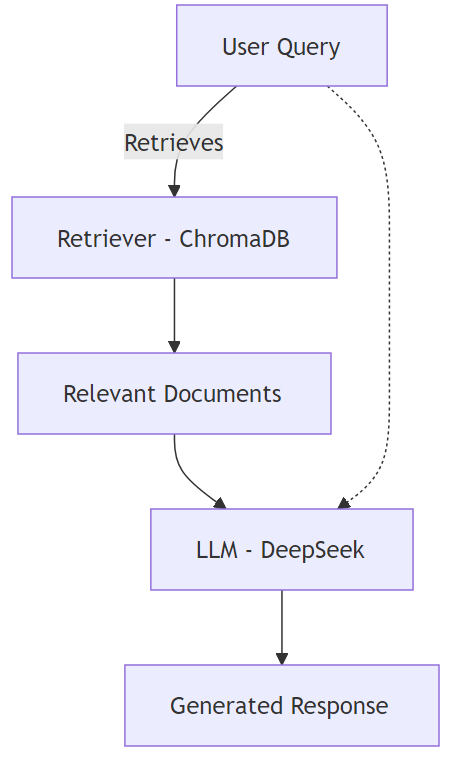

In [ ]:
# Install required packages
!pip install -q langchain langchain-community chromadb pypdf

# Install Ollama CLI
!curl -fsSL https://ollama.com/install.sh | sh

# Start Ollama server with proper initialization
import time
!ollama serve > /dev/null 2>&1 &
time.sleep(20)  # Increased initialization time

# Install required models
!ollama pull deepseek-r1
!ollama pull nomic-embed-text

# Upload PDF files
from google.colab import files
uploaded = files.upload()
pdf_paths = list(uploaded.keys())

# Document processing
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Load and split documents
docs = []
for path in pdf_paths:
    loader = PyPDFLoader(path)
    pages = loader.load()
    docs.extend(pages)

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
)
texts = text_splitter.split_documents(docs)  # This creates the 'texts' variable

# ========== Vector Store Initialization ==========
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import Chroma

embeddings = OllamaEmbeddings(model='nomic-embed-text')
vector_store = Chroma.from_documents(
    documents=texts,  # Now using properly initialized 'texts'
    embedding=embeddings
)

# ========= LLM Setup ========
from langchain_community.llms import Ollama
from langchain.chains import RetrievalQA

llm = Ollama(
    model="deepseek-r1",
    temperature=0.3,
    num_ctx=4096
)

retriever = vector_store.as_retriever(
    search_type="mmr",
    search_kwargs={"k": 5}
)

qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    return_source_documents=True
)

# Test query
query = "What are the main points discussed in the documents?"
result = qa_chain.invoke({"query": query})
print("Answer:", result['result'])
print("\nSource Documents:", result['source_documents'][:2])

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest 
pulling 96c415656d37... 100% ▕▏ 4.7 GB                         
pulling 369ca498f347... 100% ▕▏  387 B                         
pulling 6e4c38e1172f... 100% ▕▏ 1.1 KB                         
pulling f4d24e9138dd... 100% ▕▏  148 B                         
pulling 40fb844194b2... 100% ▕▏  487 B                         
verifying sha256 digest 
writing manifest 
succe

Saving _Entrepreneurship Management  - UNIT 1.pdf to _Entrepreneurship Management  - UNIT 1 (1).pdf
Answer: <think>
Okay, so I need to figure out what the main points are from these documents. Let me start by reading through each section carefully.

First, there's a list of types of goals:
Personal/social,
Target oriented,
Achievement oriented,
Specific (primary),
Overall,
Secondary,
Long range/short range.

These seem like different categories or aspects of goals that entrepreneurs might set. So the main point here is categorizing goals based on purpose and scope.

Next, under "Means of Problem Solving," there are brainstorming as a way to share ideas, formal meetings with a moderator, referencing U4-ENTREPRENEUR-BOOK 237 for case studies like Brand Chaipoint. The discussion includes topics such as companies' background, target customers, business practices, sustainable practices, and key initiatives.

Then there's the classical school of entrepreneurship, which emphasizes innovation,